In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import ward, dendrogram
import pandas as pd
import nltk
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
stemmer = SnowballStemmer("english")
df = pd.read_csv('./dataset/meta.csv')
df.columns

Index(['Unnamed: 0', 'language', 'title', 'content', 'description',
       'provider_url', 'keywords', 'provider_display', 'provider_name',
       'total_count', 'comment_count', 'share_count', 'reaction_count',
       'reddit_upvotes', 'reddit_comments', 'date', 'group', 'title_len',
       'content_len', 'description_len'],
      dtype='object')

In [3]:
df['text'] = df['title'] + df['description'] + df['content']
df.columns

Index(['Unnamed: 0', 'language', 'title', 'content', 'description',
       'provider_url', 'keywords', 'provider_display', 'provider_name',
       'total_count', 'comment_count', 'share_count', 'reaction_count',
       'reddit_upvotes', 'reddit_comments', 'date', 'group', 'title_len',
       'content_len', 'description_len', 'text'],
      dtype='object')

In [4]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [5]:
def get_similarity_matrix(content_as_str):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2,
                                       stop_words='english',use_idf=True,
                                       tokenizer=tokenize_and_stem, ngram_range=(1,3))
    tfidf_matrix = tfidf_vectorizer.fit_transform(content_as_str) #fit the vectorizer to synopses
    similarity_matrix = cosine_similarity(tfidf_matrix)
    return (similarity_matrix, tfidf_matrix)

In [12]:
def dendogram(similarity_matrixm,lables=None):
    linkage_matrix = ward(similarity_matrix) # Define the linkage_matrix using ward clustering pre-computed distances
    mpl.rcParams['lines.linewidth'] = 10

    fig, ax = plt.subplots(figsize=(15, 20)) # Set size
    ax = dendrogram(linkage_matrix, orientation="right",labels=lables);

    plt.tick_params(\
        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        length = 25)
    plt.tick_params(\
        axis= 'y',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off',
        labelsize = 20)
    plt.tick_params(width=50, length = 10)
    plt.tight_layout() # Show plot with tight layout

In [13]:
(similarity_matrix, tfdif_matrix) = get_similarity_matrix(df['text'])

In [14]:
from pprint import pprint as pp
similarity_matrix[0]

array([1.        , 0.16587853, 0.18739166, 0.08904111, 0.05119066,
       0.29306362, 0.36335758, 0.24299625, 0.27135046, 0.29065586,
       0.24622196, 0.20462428, 0.23143426, 0.22092876, 0.15267955,
       0.32352375, 0.2735318 , 0.29569299, 0.27562672, 0.29060365,
       0.2333293 , 0.31606738, 0.14775666, 0.08906242, 0.08811547,
       0.10998103, 0.18133132, 0.15360121, 0.19267915, 0.31998767,
       0.38731083, 0.49766594, 0.42570485, 0.56690089, 0.31751168,
       0.45497434, 0.47159882, 0.        , 0.        , 0.19231139,
       0.19591994, 0.12710606, 0.39430909, 0.37427442, 0.42797955,
       0.2295509 , 0.24679943, 0.25778532, 0.27041086, 0.15758194,
       0.14007426, 0.22769772, 0.09953982])

In [15]:
tfdif_matrix[0]

<1x54 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

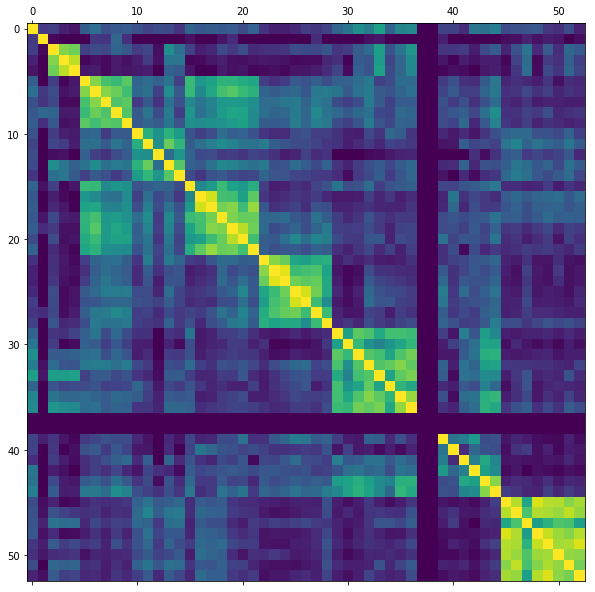

In [16]:
plt.figure(figsize=(20,10))
plt.matshow(similarity_matrix, fignum=1)
plt.show()

C:\Users\gnsd1\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\gnsd1\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


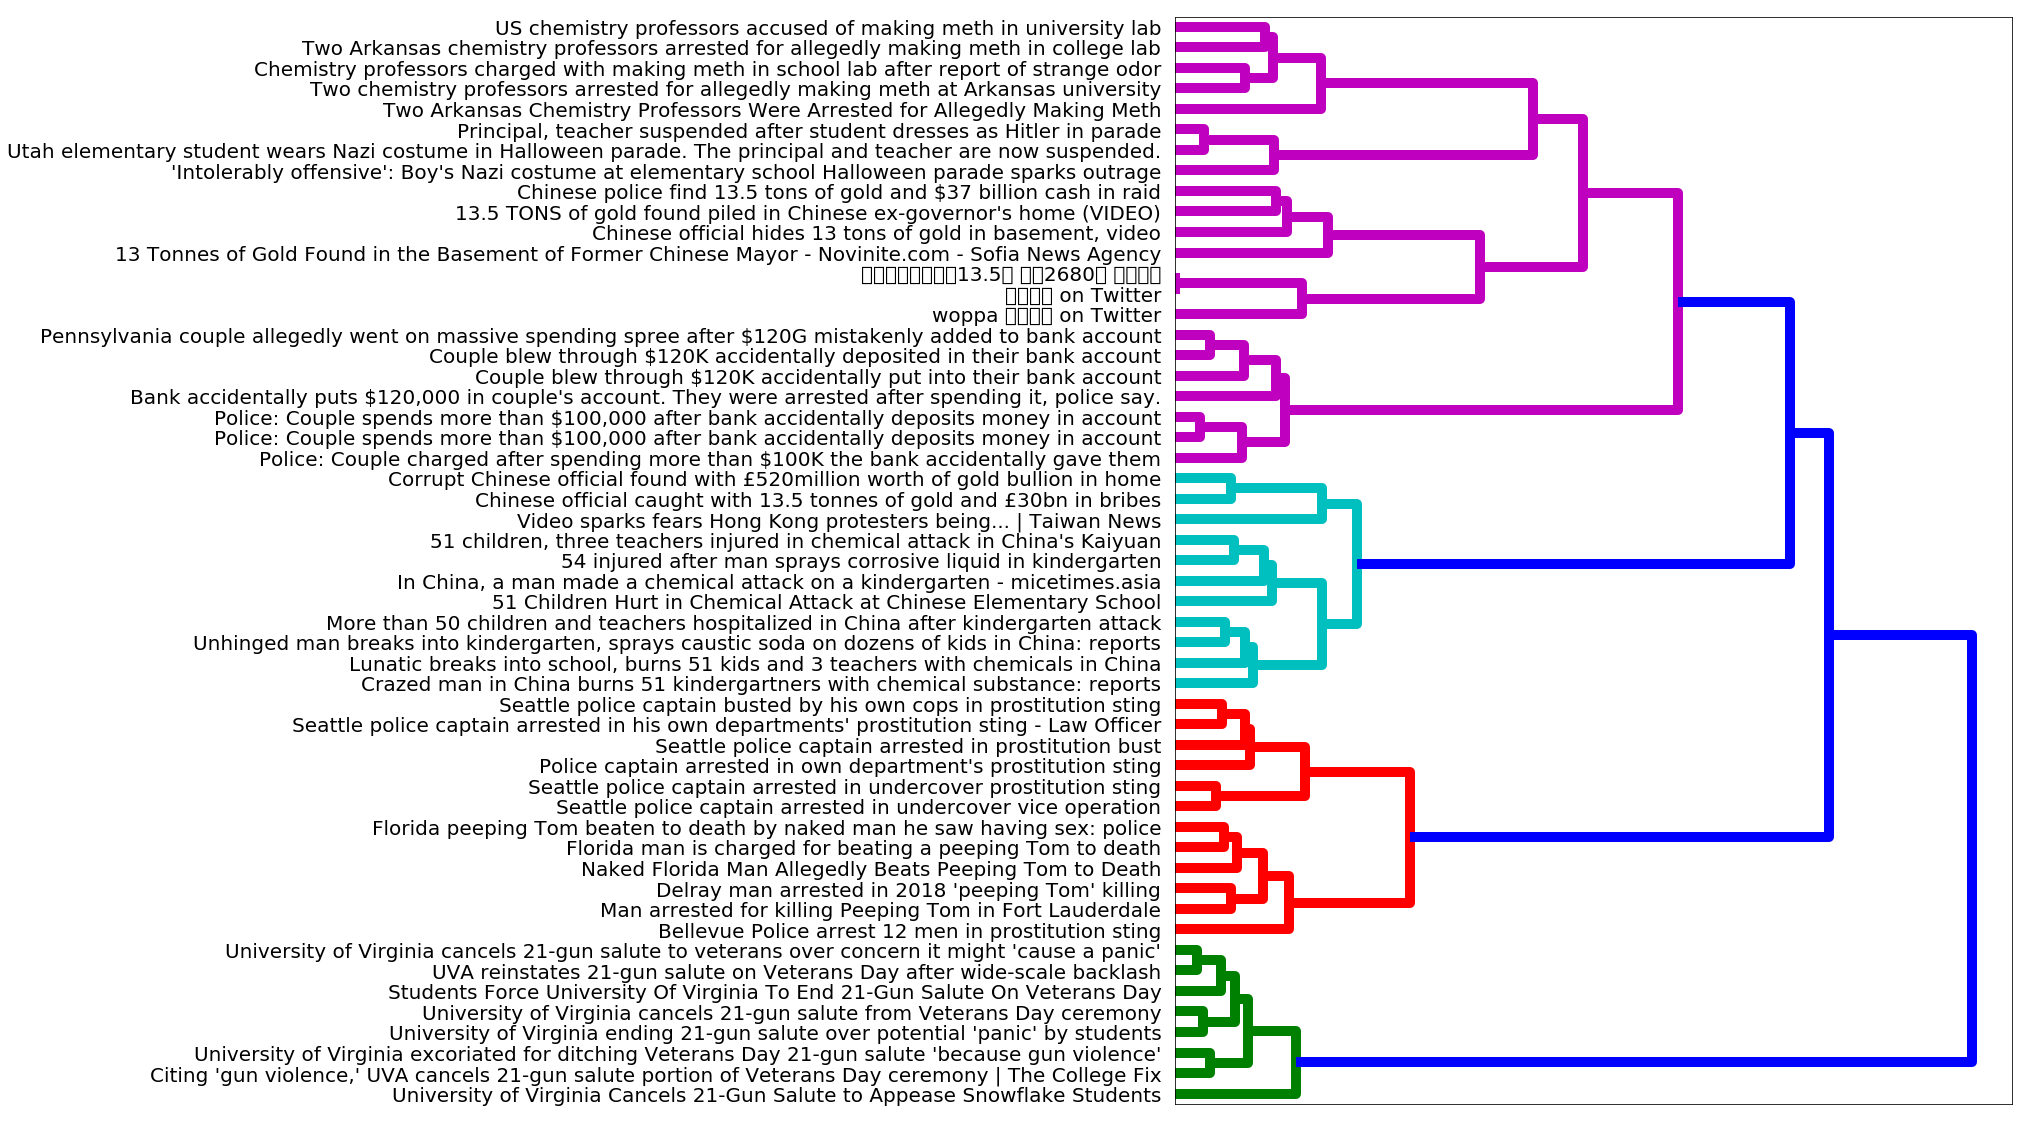

In [11]:
dendogram(similarity_matrix,df['title'].values)